<a href="https://colab.research.google.com/github/orbenishay/pandas-project/blob/master/Bicycle_6_Hagai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt # visualization, EDA
import numpy as np  # Mathematical calculations
%matplotlib inline


In [5]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving weather.csv to weather.csv


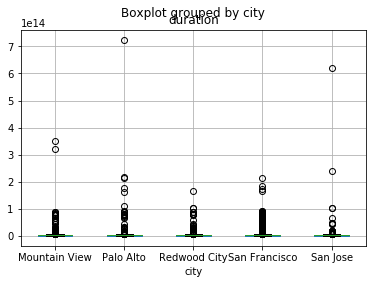

In [9]:
# Hagai's Analysis:
# -----------------------------------------------------------------------------------------
# Read csv's
df_trip = pd.read_csv("trip.csv",
                   index_col='id', parse_dates=True)
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'], errors='coerce', dayfirst=True)
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'], errors='coerce', dayfirst=True)
df_trip['date_day']=df_trip['start_date'].dt.date
df_trip['duration']=df_trip['end_date']-df_trip['start_date']
# df_trip.head
df_station = pd.read_csv("station.csv", index_col = 'id')
# df_station.head()
df_bikes = pd.read_csv("bikes.csv", index_col = 'bike_id')
# df_bikes.head()
df_weather = pd.read_csv("weather.csv", parse_dates=['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'], errors='coerce')
df_weather['date']=df_weather['date'].dt.date
# df_weather.head()

# -----------------------------------------------------------------------------------------
# Merges
df_trip_weather = df_trip.merge(df_weather, how='left', left_on = ['zip_code', 'date_day'], right_on=['zip_code','date'])
# df_trip_weather.head()
df_trip_weather_station = df_trip_weather.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
# df_trip_weather_station.head()
df_all = df_trip_weather_station.merge(df_bikes, how='left', left_on = 'bike_id', right_on='bike_id')
df_all.head()

# ----------------------------------------------------------------------------------------
# Year/Month aggregation
df_all['year'] = pd.DatetimeIndex(df_all['start_date']).year
df_all['month'] = pd.DatetimeIndex(df_all['start_date']).month
df_all['hour'] = pd.DatetimeIndex(df_all['start_date']).hour
df_all['weekday'] = pd.DatetimeIndex(df_all['start_date']).weekday
df_group=df_all.groupby(['month','year']).agg({'start_date':'count'}).unstack(0)
df_group.plot(kind='bar', stacked=False, figsize=(12, 6), by='year')

# ----------------------------------------------------------------------------------------
# Duration
df_all.boxplot(column='duration', by='city')
df_all['duration'].describe()
# df_all.groupby(['city']).agg({'duration_minutes':'mean'}).head()

# ------------------------------------------------------------------------------------------
# rents distribution by city

df_group_city_station=df_all.groupby(['city','station_name']).agg({'start_date':'count'})
df_group_city_station.boxplot(column='start_date', by='city')
df_group_city_station.groupby('city').describe().unstack(0)

# ------------------------------------------------------------------------------------------
# count rent by hour & weekday

# ------------------------------------------------------------------------------------------
# duration distribution




